The following load the data Cifar 10 data. 

In [2]:
import _pickle as pickle


import numpy as np
import os


def get_CIFAR10_data(cifar10_dir, num_training=49000, num_validation=1000, num_test=1000):
    '''
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the neural net classifier.
    '''
    # Load the raw CIFAR-10 data
    X_train, y_train, X_test, y_test = load(cifar10_dir)

    # Subsample the data
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]

    X_train = X_train.astype(np.float64)
    X_val = X_val.astype(np.float64)
    X_test = X_test.astype(np.float64)

    # Transpose so that channels come first
    X_train = X_train.transpose(0, 3, 1, 2)
    X_val = X_val.transpose(0, 3, 1, 2)
    X_test = X_test.transpose(0, 3, 1, 2)
    mean_image = np.mean(X_train, axis=0)
    std = np.std(X_train)

    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    X_train /= std
    X_val /= std
    X_test /= std

    return {
        'X_train': X_train, 'y_train': y_train,
        'X_val': X_val, 'y_val': y_val,
        'X_test': X_test, 'y_test': y_test,
        'mean': mean_image, 'std': std
    }


def load_CIFAR_batch(filename):
    ''' load single batch of cifar '''
    with open(filename, 'rb') as f:
        datadict = pickle.load(f, encoding ='bytes')
        X = datadict[b'data']
        Y = datadict[b'labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1)
        Y = np.array(Y)
        return X, Y


def load(ROOT):
    ''' load all of cifar '''
    xs = []
    ys = []
    for b in range(1, 6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte




In [3]:
Xtr, Ytr, Xte, Yte = load(r'C:\Users\hzhang\Downloads\cifar-10-python\cifar-10-batches-py')
Yte.shape

(10000,)

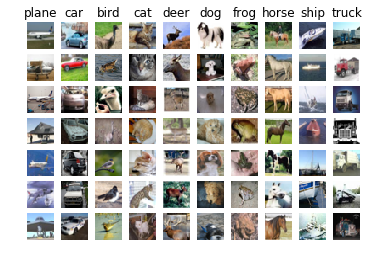

In [4]:
import matplotlib.pyplot as plt

# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(Ytr == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(Xtr[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()